# **Lecture 3: Exploratory Data Analysis (EDA) in Agriculture**

## Definition and Importance of EDA

Exploratory Data Analysis (EDA) is an essential initial step in the data analysis process. It involves visualizing, summarizing, and interpreting the information that is hidden in rows and columns of data. The main aim of EDA is to understand the data, identify anomalies or outliers, uncover patterns, and extract valuable insights. This, in turn, provides a solid foundation for the subsequent analytical or modeling activities.

## Types of Data in Agriculture

There are various types of data that researchers and professionals in agriculture frequently encounter:

- **Categorical Data**: This data type represents categories or labels. It can be further divided into nominal (e.g., crop types like wheat, rice, maize) and ordinal data (e.g., low, medium, high).

- **Numerical Data**: Represents numbers, and can be either discrete (e.g., number of farms) or continuous (e.g., rainfall in mm).

- **Time-series Data**: Observations recorded at regular time intervals. For instance, the monthly prices of a commodity over several years.

- **Cross-sectional Data**: Observations recorded at the same point in time. An example could be the agricultural yield of different farms in a particular year.

- **Panel Data**: This is a combination of time-series and cross-sectional data. For example, observing the yields of multiple farms over multiple years.

To help differentiate these data types further, here's a simple table:

| Data Type        | Description                                           | Example                                       |
|------------------|-------------------------------------------------------|-----------------------------------------------|
| Categorical      | Represents categories or labels                        | Crop types: Wheat, Rice                       |
| Numerical        | Represents numbers                                     | Rainfall in mm, Number of farms               |
| Time-series      | Observations over regular intervals                   | Monthly commodity prices over several years   |
| Cross-sectional  | Observations at a specific point in time               | Agricultural yield of farms in a given year   |
| Panel            | Combination of time-series and cross-sectional data    | Yields of multiple farms over several years   |

## Statistical Summaries in EDA

### Descriptive Statistics

Before proceeding with any analytical approach, understanding the basic statistical properties of the dataset is essential. This process provides a snapshot of central tendencies, spread, and shape of the dataset's distribution.

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
print(df)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [2]:
stats_summary = df.describe()
print(stats_summary)

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000



This provides count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max for all numerical columns.

## Correlation and Association

Correlation measures the strength and direction of a linear relationship between two variables. The Pearson correlation coefficient, which ranges from -1 to 1, is the most widely used method to measure it. A value close to 1 implies a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value close to 0 implies a weak or no linear correlation.

In [3]:
correlation_matrix = df.corr()
print(correlation_matrix)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


This returns a matrix of Pearson correlation coefficients between every pair of numerical columns in the dataframe. A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to increase. A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.

We can also visualize the correlation matrix using a heatmap.

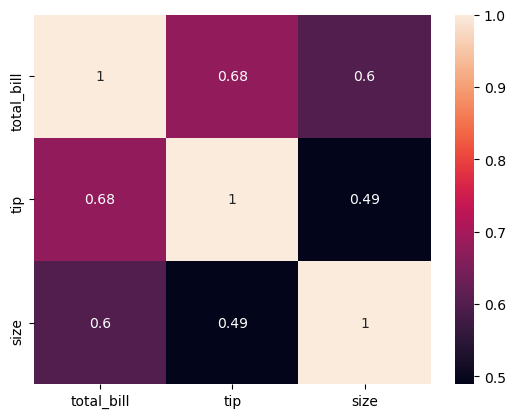

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.show()


Or a pairplot, which shows the relationship between every pair of variables in a dataset.

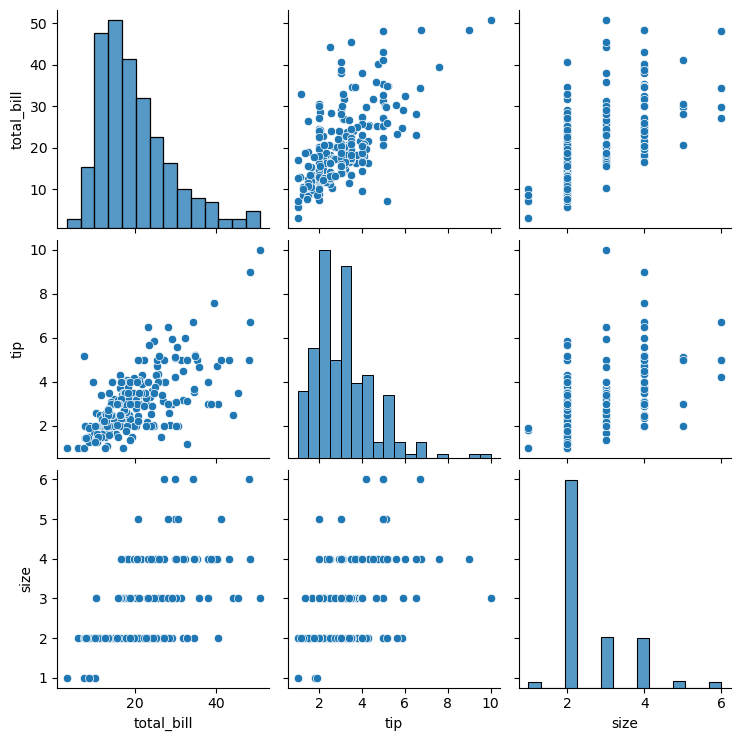

In [7]:
sns.pairplot(df)
plt.show()

One can also limit your plots to specific variables, which is useful when dealing with a large number of variables.

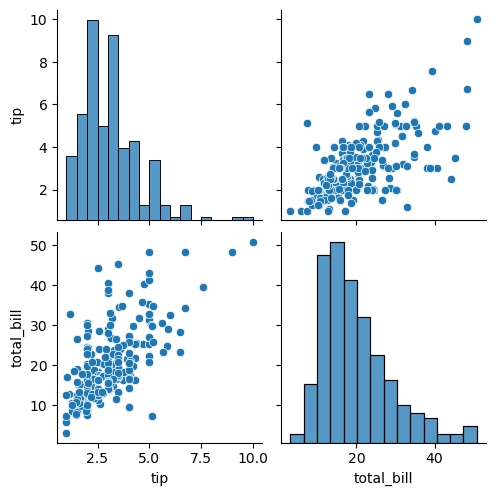

In [10]:
sns.pairplot(data=df, vars=['tip','total_bill'])
plt.show()

## Exploring groups of data

  - Aggregate data based on column values.
  - Example to group by city and get the average age:

In [4]:
grouped_data = df.groupby('sex')['tip'].mean()
print(grouped_data)

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


- Note the structure 
  1. **`df.groupby('sex')`**: This groups the DataFrame `df` by the unique values in the 'city' column. The result is a `groupby` object which is a special type of pandas object that has similar properties to a DataFrame but represents a collection of groups (or segments) of your data.
  2. **`df.groupby('sex')['tip']`**: This selects the 'age' column from each group. Now, you have a `groupby` object that is focused on the 'age' values for each city.
  3. **`.mean()`**: This calculates the mean (or average) of the 'age' values for each city.


We can also pass apply other functions:

In [5]:
grouped_data = df.groupby('sex')['tip'].std()
print(grouped_data)

sex
Male      1.489102
Female    1.159495
Name: tip, dtype: float64


Hence there is a smaller standard deviation in the tips given by women.

## Aggregating ungrouped data

`.agg()` applies aggregating functions across a DataFrame. The aggregating function will run on every numeric column in the DataFrame.

In [6]:
df.agg(['mean', 'std'])

/var/folders/zk/7bq77vmd70327r7h12gqk8sc0000gn/T/ipykernel_94046/3387900303.py:1: FutureWarning: ['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean', 'std'])


,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100


Specifying aggregations for columns

In [9]:
df.agg({"total_bill": ["median", "std"], "tip": ["median", "std"]})

,total_bill,tip
median,17.795000,2.900000
std,8.902412,1.383638


## Detecting and Handling Outliers

Outliers are data points that significantly deviate from other observations in the dataset. They might be a result of variability or errors. The Interquartile Range (IQR) method is commonly used to detect them. Here's the logic:

- **IQR**: It's the range between the first quartile (25%) and the third quartile (75%) in the dataset.
- Any data point that falls below Q1 - 1.5I*QR or above Q3 + 1.5*IQR is considered an outlier.

In [6]:
# Step 1: Calculate the 1st and 3rd quantiles (i.e., 25th and 75th percentiles)
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define boundaries for outliers
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Step 4: Combine the two conditions (lower and upper) using an "OR" operation - save the series to a column
df['is_outlier_tip'] = (df['tip'] < lower_boundary) | (df['tip'] > upper_boundary)
df

,total_bill,tip,sex,smoker,day,time,size,is_outlier_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


Lets go ahead and drop the row with the outlier

In [ ]:
df = df[df['is_outlier_A'] == False]
df

Lets also drop the outlier column

In [ ]:
df = df.drop(columns=['is_outlier_A'])

-----

## Tutorial 3, Part 1: Exploring the data

Before you get started
- Go to your Setup.ipynb and pull the latest version of the course repository
- Then create a notebook for this tutorial and rename it to  to \<your_name>\<Lecture_3_Tutorial>
- Share with me: jan5020@gmail.com

Then you need to do the following:
- import the necessary libraries
- load the data
    - the possum data, calling it df_pos
    - the South African maize data, df_maize

Now
- describe the possum data
- describe the maize data
- check the correlation between the variables in the possum data
- check the correlation between the variables in the maize data
- identify the outliers in the `totalL`, and `weight` variables in the possum data and give them the appropriate variable name
____
____

## **Data Visualization in EDA**
### Python Libraries for Visualization

Data visualization is an integral part of Exploratory Data Analysis (EDA) as it allows for a graphical representation of information and data. Python offers a range of libraries tailored for various visualization needs. Here, we'll introduce three of the most popular ones:

- **Matplotlib**: One of the most widely used visualization libraries in Python, Matplotlib provides a flexible platform to create a vast array of static, animated, and interactive visualizations. It's highly customizable and serves as the foundation for many other plotting libraries.

- **Seaborn**: Built on top of Matplotlib, Seaborn provides a higher-level interface for creating beautiful, statistically-themed visualizations. It comes with several built-in themes and color palettes to make aesthetically pleasing charts with ease.

- **Plotly**: Unlike the other two, Plotly is mainly known for enabling interactive visualizations. It supports a multitude of chart types and is particularly useful when you want to create visualizations that users can interact with.

To start working with these libraries, you'll first need to import them. Here's how you can do it:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Matplotlib (`plt`)

**Matplotlib** is the foundational library for many other Python plotting libraries. Here's a quick primer:

- **Basic Plotting**

    The `plot` method is used to create a basic line plot. It takes in an array of X-axis values and an array of corresponding Y-axis values as arguments. It also accepts an optional third argument for customizing the line style and color. 

    This plots `y` vs `x` as lines and markers.


In [ ]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.show()

- **Titles & Labels**: 

    You can use the `title`, `xlabel` and `ylabel` methods to set a title, X-axis label, and Y-axis label for the plot.

In [ ]:
plt.plot(x, y)
plt.title("Square Numbers")
plt.xlabel("Value")
plt.ylabel("Square of Value")
plt.show()

- **Multiple Plots**: 
    You can use the `subplot` method to create multiple plots on the same canvas. It takes in three arguments: the number of rows, number of columns, and the index of the active subplot (starts from 1, not 0). The `suptitle` method can be used to set the title for the entire plot.

In [ ]:
y2 = [1, 8, 27, 64, 125]
plt.plot(x, y, label="Squares")
plt.plot(x, y2, label="Cubes")
plt.legend()  # To show the legend
plt.show()

#### Seaborn (`sns`)

**Seaborn** is built on top of Matplotlib and offers a higher-level, more aesthetically pleasing interface:

- **Histogram**:


In [ ]:
data = [1, 1, 2, 3, 3, 3, 4, 4, 5]
sns.histplot(data)
plt.show()

- **Box Plot**:

    Here, `tips_dataset` would be a sample dataset you've loaded, and you're visualizing the total bill amounts by day.

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips_dataset)
plt.show()

What does the box plot tell you about the distribution of total bill amounts on different days?

- **Scatter Plot**:


In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=tips_dataset)
plt.show()

- **Scatter Plot with Regression Line**:

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips_dataset)
plt.show()

- **Line plot**:

In [ ]:
sns.lineplot(x="total_bill", y="tip", data=tips_dataset, label="Line Plot", color='green',marker='o')
plt.title("Line Plot with Seaborn")
plt.show()


Both libraries work well with Pandas dataframes, which means you can directly pass columns of a dataframe to these functions. Remember to always use `plt.show()` with Matplotlib to ensure the plot is rendered correctly.

Explore the Seaborn plotting library here: https://seaborn.pydata.org/examples/index.html 

----

## Tutorial 3, Part 2: Plotting data with Seaborn

Using the possum data and **sns**, create the following plots:
- a scatter plot with regression line of skull length vs skull width
- a histogram of skull length
- a boxplot of weight, categorised by sex

Using the maize data and **sns**, create the following plots:
- but first, calculate the average yield for each year
- a line plot of yield vs year
- a line plot of the white and yellow maize price
    - add R/ton to the y-axis
    - add a legend
    - make the white maize blue red and the yellow maize line orange

Stretch goal:
- calculate the average yield per decade
- create a bar plot of yield vs decade
- a boxplot of yield, categorised by decade

----
----